# CIFAR10 CNN MODEL

## Importing Libraries

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [23]:
import cv2
import numpy as np
from keras.constraints import maxnorm
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from keras.layers import Flatten
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

In [6]:
## Importing CIFAR10 Dataset and view the shape of train and test data.

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
# shape to know dimensions the tensor has along each axis

X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
# Number of categories in the dataset

number_cat = 10

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

### Image preprocessing

In [11]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

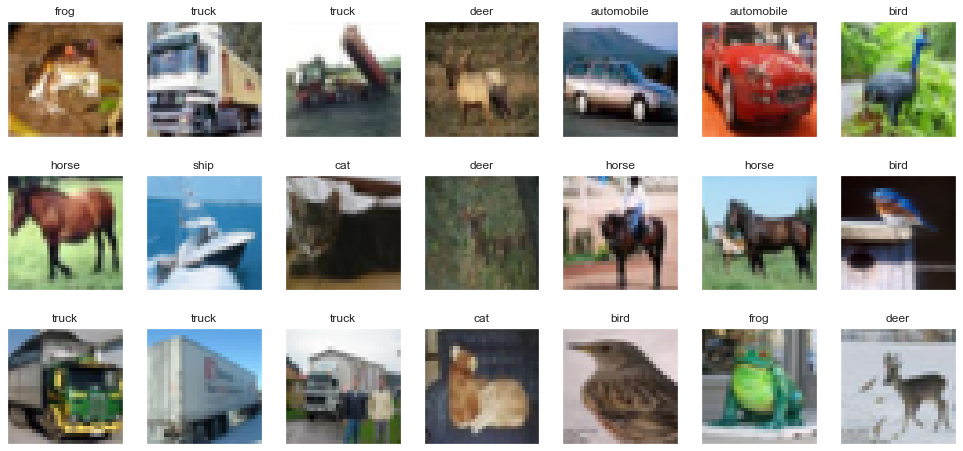

In [12]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [13]:
# Normalizing X_train and X_test from 0-255 to 0.0-0.1

X_train = X_train/255
X_test = X_test/255

### Label preprocessing

In [14]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(y_train)

OneHotEncoder(sparse=False)

In [15]:
# one hot encode outputs. Converting decimal to binary to perform training

y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

## TRAINING MODEL

In [24]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (32,32,3), kernel_constraint=maxnorm(3)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(filters = 32, padding = 'same', kernel_size = (3,3), activation = 'relu', kernel_constraint=maxnorm(3)))
cnn_model.add(MaxPooling2D(2,2))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_constraint=maxnorm(3)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_constraint=maxnorm(3)))
cnn_model.add(MaxPooling2D(2,2))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_constraint=maxnorm(3)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_constraint=maxnorm(3)))
cnn_model.add(MaxPooling2D(2,2))

cnn_model.add(Flatten())
cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(units = 1024, activation = 'relu', kernel_constraint=maxnorm(3)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units = 512, activation = 'relu', kernel_constraint=maxnorm(3)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [25]:
# Compiling the Model

epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum = 0.9, decay = decay, nesterov=False)
cnn_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(cnn_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 64)        0         
                                                      

C:\Users\vaish\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [26]:
# Fitting the Model

history= cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=32)

Epoch 1/3
1563/1563 [==============================] - 211s 134ms/step - loss: 1.8303 - accuracy: 0.3216 - val_loss: 1.5526 - val_accuracy: 0.4293
Epoch 2/3
1563/1563 [==============================] - 213s 136ms/step - loss: 1.4344 - accuracy: 0.4783 - val_loss: 1.3071 - val_accuracy: 0.5245
Epoch 3/3
1563/1563 [==============================] - 207s 132ms/step - loss: 1.2708 - accuracy: 0.5411 - val_loss: 1.2280 - val_accuracy: 0.5585


In [27]:
#final evaluation of the model

scores=cnn_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy = %.2f%% " % (scores[1]*100))

Accuracy = 55.85% 


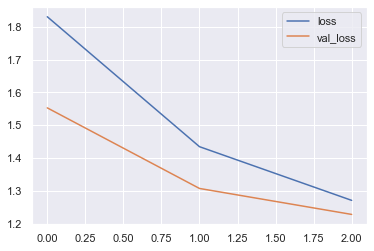

In [28]:
# plot the training and validation accuracy at each epochs:

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

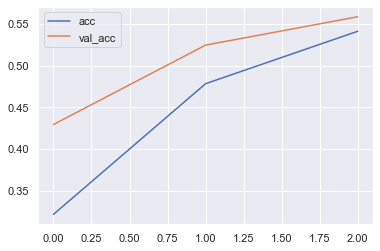

In [29]:
# Plot accuracy per iteration

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

## TRAINING API MODEL

In [30]:
from tensorflow.keras.layers import Input

i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), padding="same", activation="relu")(i)
x = Dropout(0.20)(x)
x = Conv2D(32, (3,3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(64, (3,3), padding="same", activation="relu")(x)
x = Dropout(0.20)(x)
x = Conv2D(64, (3,3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(128, (3,3), padding="same", activation="relu")(x)
x = Dropout(0.20)(x)
x = Conv2D(128, (3,3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)           
x = Dense(number_cat, activation="softmax")(x)


model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_13 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 15, 15, 64)        18496     
                                                             

In [33]:
# Compiling the Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
# Fitting the Model

history= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=32)

Epoch 1/2
1563/1563 [==============================] - 150s 96ms/step - loss: 0.9081 - accuracy: 0.6797 - val_loss: 0.8867 - val_accuracy: 0.6969
Epoch 2/2
1563/1563 [==============================] - 151s 96ms/step - loss: 0.8103 - accuracy: 0.7164 - val_loss: 0.7682 - val_accuracy: 0.7333


In [36]:
scores=model.evaluate(X_test, y_test, verbose=0)
print("Accuracy = %.2f%% " % (scores[1]*100))

Accuracy = 73.33% 


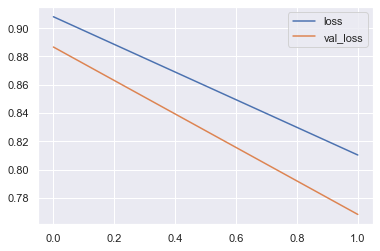

In [37]:
# plot the training and validation accuracy at each epochs:

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

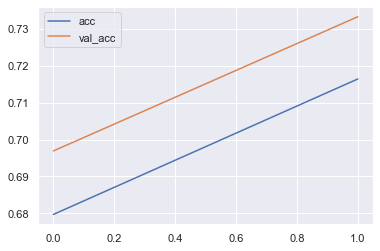

In [38]:
# Plot accuracy per iteration

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

## SAVING THE MODEL

In [46]:
model.save('CNN_CIFAR.h5')

In [47]:
model = load_model('CNN_CIFAR.h5')

## PREDICTING THE IMAGES OF THE TEST DATASET

In [48]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [49]:
predictions = model.predict(X_test)

In [50]:
predictions = one_hot_encoder.inverse_transform(predictions)

In [51]:
y_test = one_hot_encoder.inverse_transform(y_test)

In [52]:
cm = confusion_matrix(y_test, predictions)

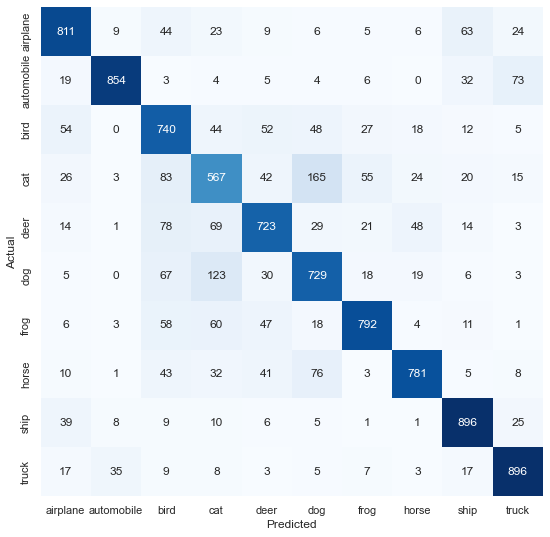

In [53]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

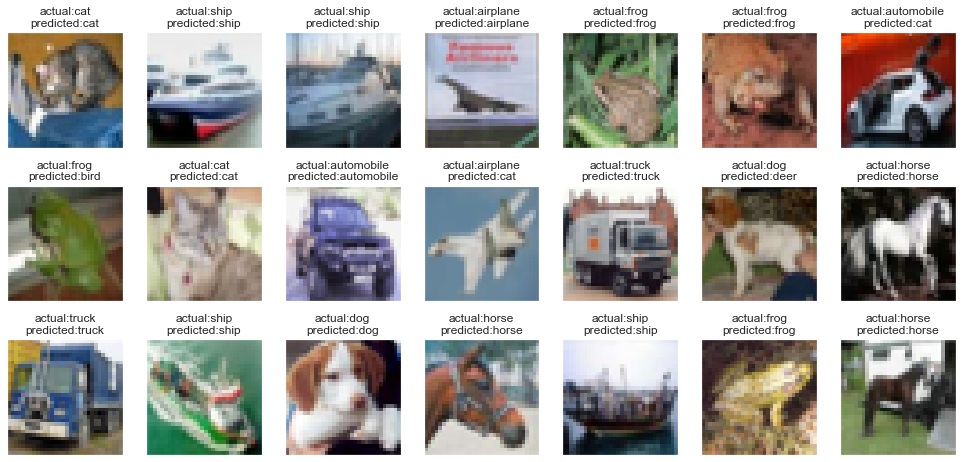

In [55]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n' 
                            + 'predicted:' + labels[predictions[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()